Required libraries are imported

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from decimal import Decimal
import sklearn .datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
pd.options.mode.chained_assignment = None


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#importing the Among us gamers game status dataset from kaggle
user1 = pd.read_csv("User1.csv")
user2 = pd.read_csv("User2.csv")
user3 = pd.read_csv("User3.csv")
user4 = pd.read_csv("User4.csv")
user5 = pd.read_csv("User5.csv")


Top Steam Games dataset pulled from Kaggle is pulled from local

In [55]:
df_steamtop100 = pd.read_csv('steam_top_100.csv')

In [56]:
df_steamtop100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Steam id            100 non-null    int64  
 1   Game                100 non-null    object 
 2   Current players     100 non-null    int64  
 3   Peak players today  100 non-null    int64  
 4   Release date        99 non-null     object 
 5   Review summary      99 non-null     object 
 6   Total reviews       99 non-null     float64
 7   Tags                98 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


Games are ranked by popularity using current players.

In [57]:
df_steamtop100.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags
0,730,Counter-Strike: Global Offensive,736875,775266,21 Aug 2012,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...
1,570,Dota 2,580933,649690,9 Jul 2013,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...
2,1063730,New World,243815,307146,28 Sep 2021,Mostly Positive,145931.0,Massively Multiplayer:Open World:MMORPG:Advent...
3,1172470,Apex Legends,121313,245235,4 Nov 2020,Very Positive,338236.0,Free to Play:Battle Royale:Multiplayer:Shooter...
4,440,Team Fortress 2,104477,111884,10 Oct 2007,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...


I made an update to make the Release Date column more convenient and saved the newly updated dataset to locale. In this process, I first copied my original dataset. Then I revised each date data as day/month/year.

In [58]:
datas = df_steamtop100.copy()
dates = datas.loc[:, ('Release date')]

for i in range(len(dates)):
    if(type(dates.loc[i]) == str):
        if(len(dates.loc[i].split()) == 3):
            dates.loc[i] = datetime.strptime(dates.loc[i], '%d %b %Y')
        else:
            dates.loc[i] = datetime.strptime(dates.loc[i], '%b %Y')           
    else:
        i=0;

datas.loc['Release date'] = dates
datas.to_csv (r'steam_top_updated.csv', index = False, header=True)

Since we want to examine how long the popular games have been played and their stability against time, we open a column named Howlong and list how long the games have been on the market descending order.

In [59]:
datas2 = datas.copy()
datas2["How long"] = datetime.now() - datas2["Release date"]
sorted_datas2 = datas2.sort_values(by = ['How long'], ascending = False)
sorted_datas2.head()

,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,How long
55,10.0,Counter-Strike,15244.0,15752.0,2000-11-01 00:00:00,Overwhelmingly Positive,111163.0,Action:FPS:Multiplayer:Shooter:Classic:Team-Ba...,7756 days 22:14:46.458951
30,4000.0,Garry's Mod,29072.0,38548.0,2006-11-29 00:00:00,Overwhelmingly Positive,640525.0,Sandbox:Multiplayer:Funny:Moddable:Building:Co...,5537 days 22:14:46.458951
4,440.0,Team Fortress 2,104477.0,111884.0,2007-10-10 00:00:00,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,5222 days 22:14:46.458951
61,550.0,Left 4 Dead 2,14277.0,21108.0,2009-11-16 00:00:00,Overwhelmingly Positive,390516.0,Zombies:Co-op:FPS:Multiplayer:Shooter:Action:O...,4454 days 22:14:46.458951
49,8930.0,Sid Meier's Civilization V,18267.0,23350.0,2010-09-23 00:00:00,Overwhelmingly Positive,109910.0,Turn-Based Strategy:Strategy:Turn-Based:Multip...,4143 days 22:14:46.458951


In order to be able to analyze Covid, I filtered the ones that were released before 2020 and had a high Current Players count. Here, unlike other games, PUBG was included in our list.

In [60]:
sorted_ascending_datas2 = datas2.sort_values(by = ['How long'], ascending = True)
sorted_ascending_datas2['Release date'] = pd.to_datetime(sorted_ascending_datas2['Release date'])
sorted_ascending_datas2[(sorted_ascending_datas2['Release date'] < '2020-01-01')].sort_values(by = ['Current players'], ascending = False).head()



,Steam id,Game,Current players,Peak players today,Release date,Review summary,Total reviews,Tags,How long
0,730.0,Counter-Strike: Global Offensive,736875.0,775266.0,2012-08-21,Very Positive,5993058.0,FPS:Shooter:Multiplayer:Competitive:Action:Tea...,3445 days 22:14:46.458951
1,570.0,Dota 2,580933.0,649690.0,2013-07-09,Very Positive,1599180.0,Free to Play:MOBA:Multiplayer:Strategy:eSports...,3123 days 22:14:46.458951
4,440.0,Team Fortress 2,104477.0,111884.0,2007-10-10,Very Positive,821568.0,Free to Play:Hero Shooter:Multiplayer:FPS:Shoo...,5222 days 22:14:46.458951
5,578080.0,PUBG: BATTLEGROUNDS,103354.0,293759.0,2017-12-21,Mixed,1530629.0,Survival:Shooter:Multiplayer:Battle Royale:FPS...,1497 days 22:14:46.458951
6,252490.0,Rust,86156.0,110489.0,2018-02-08,Very Positive,554535.0,Survival:Crafting:Multiplayer:Open World:Open ...,1448 days 22:14:46.458951


We took the intersection points of the first 50 games in the Top Steam Games dataset and the first 50 games of the dataset that we added and sorted the How long column and showed them in the table. "Thus, we have reached the games that have been on the market for a long time and maintain their popularity.

We also pulled the information from the tags column and kept it in two separate columns to understand whether the games are multiplayer and free.

Based on the data we encountered here, we decided to examine the status and features of Counter-Strike: Global Offensive, Dota 2, Team Fortress 2 and PUBG: BATTLEGROUNDS over time. Since our main item is to research the games that are rapidly increasing in popularity and then decreasing, and their reasons, we include the amongus dataset in this dataset with our own initiative. (In our previous report, we took the top 20 games and intersected them. We changed this to the top 50 games to access more data).


In [61]:
df_steam_genres= pd.read_csv('steam_genres.csv')
df_steam_genres = df_steam_genres[['name', 'developer', 'platforms', 'genres']]
df_steam_genres.head()

,name,developer,platforms,genres
0,Counter-Strike,Valve,windows;mac;linux,Action
1,Team Fortress Classic,Valve,windows;mac;linux,Action
2,Day of Defeat,Valve,windows;mac;linux,Action
3,Deathmatch Classic,Valve,windows;mac;linux,Action
4,Half-Life: Opposing Force,Gearbox Software,windows;mac;linux,Action


In [62]:
df_topwithlong = sorted_datas2.head(50)
df_topwithoutlong = df_steamtop100.head(50)
combine = pd.merge(df_topwithlong, df_topwithoutlong,on=['Game'], how = 'inner')
combine['How long _year'] = [i.days/365 for i in combine['How long']]
[str(i) for i in combine['Tags_x']]
result = []
for i in combine['Tags_x']:
    if 'Free to Play' in i:
        result.append("Yes")
    else:
        result.append("No")
       
combine["Free to play or not"] = result

result = []
for i in combine['Tags_x']:
    if "Multiplayer" in i:
        result.append("Yes")
    else:
        result.append("No")
       
combine["Multiplayer or not"] = result
combineforpie = combine.copy()
combine = pd.merge(combine, df_steam_genres,left_on="Game", right_on="name", how = 'outer')
combine = combine[combine.Game.notnull()]       
sorted_combine = combine[['Game','Release date_y','Current players_y','How long _year','Multiplayer or not','Free to play or not','developer','platforms', 'genres']].sort_values(by = ['Current players_y'], ascending = False).style.background_gradient(cmap="Reds")
sorted_combine

,Game,Release date_y,Current players_y,How long _year,Multiplayer or not,Free to play or not,developer,platforms,genres
4,Counter-Strike: Global Offensive,21 Aug 2012,736875.000000,9.438356,Yes,No,Valve;Hidden Path Entertainment,windows;mac;linux,Action;Free to Play
7,Dota 2,9 Jul 2013,580933.000000,8.556164,Yes,Yes,Valve,windows;mac;linux,Action;Free to Play;Strategy
1,Team Fortress 2,10 Oct 2007,104477.000000,14.306849,Yes,Yes,Valve,windows;mac;linux,Action;Free to Play
29,PUBG: BATTLEGROUNDS,21 Dec 2017,103354.000000,4.101370,Yes,No,nan,nan,nan
30,Rust,8 Feb 2018,86156.000000,3.967123,Yes,No,Facepunch Studios,windows;mac,Action;Adventure;Indie;Massively Multiplayer;RPG
12,Grand Theft Auto V,13 Apr 2015,82189.000000,6.794521,Yes,No,Rockstar North,windows,Action;Adventure
10,Path of Exile,23 Oct 2013,56781.000000,8.265753,Yes,Yes,Grinding Gear Games,windows,Action;Adventure;Free to Play;Indie;Massively Multiplayer;RPG
19,Dead by Daylight,14 Jun 2016,55132.000000,5.621918,Yes,No,Behaviour Digital Inc.,windows,Action
14,Rocket League,6 Jul 2015,46488.000000,6.564384,Yes,No,nan,nan,nan
26,ARK: Survival Evolved,27 Aug 2017,45564.000000,4.419178,Yes,No,Studio Wildcard;Instinct Games;Efecto Studios;Virtual Basement LLC,windows;mac;linux,Action;Adventure;Indie;Massively Multiplayer;RPG


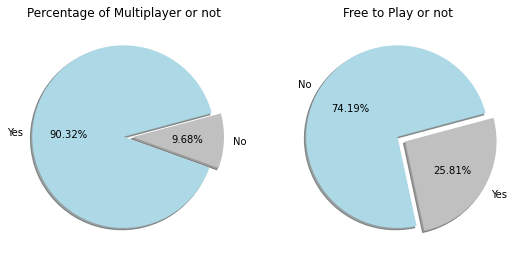

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(9, 9))
axes[0].my_labels = 'Multiplayer','Not multiplayer'
my_colors = ['lightblue','silver']
my_explode = (0, 0.1)

axes[0].pie(x=combine['Multiplayer or not'].value_counts(),labels=combine['Multiplayer or not'].value_counts().index, autopct='%0.2f%%',startangle=15, shadow = True, colors=my_colors, explode = my_explode)
axes[0].set_title("Percentage of Multiplayer or not")


axes[1].my_labels = 'Free','Not Free'
axes[1].pie(x=combine['Free to play or not'].value_counts(),labels=combine['Free to play or not'].value_counts().index, autopct='%0.2f%%',startangle=15, shadow = True, colors=my_colors, explode = my_explode)
axes[1].set_title("Free to Play or not")


plt.show()


KNN Algorithms. We wonder is there any relationship between 'Current players','Peak players today'and 'Review summary'. Normally if a game played more, that means people like it and they give pozitive feedbacks. If they don't like, they give negative feedbacks and it affects other people(which not currently play) so the number of players will be reduce. We used KNN algorithm and split our set to train and test. But we know it's just 100 datas and all of them on the top so they all  have pozitive feedbacks with different levels. The labels are Overwhelmingly Pozitive, Very Pozitive, Mostly Pozitive and Mixed. Our test score is 0.75. So we can say there is a relationship and there is something in our opinion.

In [64]:
knn = KNeighborsClassifier(n_neighbors=3)
datas_tree = df_steamtop100.copy()
datas_tree = datas_tree[['Current players','Peak players today','Review summary']]
datas_tree = datas_tree.dropna()
X_train, X_test, y_train, y_test = train_test_split(datas_tree[['Current players','Peak players today']],datas_tree['Review summary'],random_state = 40, test_size = 0.20)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
#print("Test set predictions:\n{}".format(y_pred))
print("Test set score:{:.2f}".format(np.mean(y_pred == y_test)))


Test set score:0.75


In [65]:
amongus = df_steam_genres[df_steam_genres['name'] == 'Among Us']
amongus

,name,developer,platforms,genres
24798,Among Us,Innersloth,windows,Casual


In [66]:
combine = combine.sort_values(by = ['Current players_y'], ascending = False).head(7)
current = combine.copy()
peak = combine[['Game','Peak players today_y']].sort_values(by = ['Peak players today_y'], ascending = False)
how_long = combine[['Game','How long _year']].sort_values(by = ['How long _year'], ascending = False)
listoflabels_current = list(current['Game'].values)
listoflabels_peak = list(peak['Game'].values)
listoflabels_how_long = list(how_long['Game'].values)


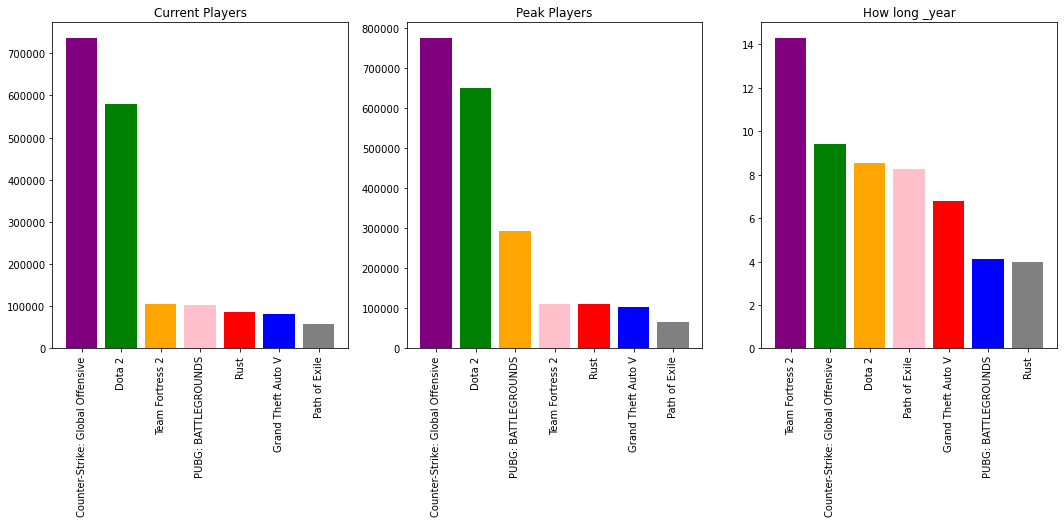

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors =['purple','green','orange','pink','red','blue','grey']

axes[0].bar(range(len(combine['Game'])), combine['Current players_y'].sort_values(ascending = False), color = colors)
axes[0].set_xticks(range(len(combine['Game'])))
axes[0].set_xticklabels(listoflabels_current, rotation='vertical')
axes[0].set_title('Current Players')

axes[1].bar(range(len(combine['Game'])), combine['Peak players today_y'].sort_values(ascending = False), color = colors)
axes[1].set_xticks(range(len(combine['Game'])))
axes[1].set_xticklabels(listoflabels_peak, rotation='vertical')
axes[1].set_title('Peak Players')

axes[2].bar(range(len(combine['Game'])), combine['How long _year'].sort_values(ascending = False), color = colors)
axes[2].set_xticks(range(len(combine['Game'])))
axes[2].set_xticklabels(listoflabels_how_long, rotation='vertical')
axes[2].set_title('How long _year')
plt.show()

It is clearly seen in the graphics that the Counter Strike game has been very popular for a long time. Dota2 exhibits a similar situation. The interesting thing here is that although PUBG's time on the market is almost 1/3 of Team Fortress, it has made a serious leap forward in the Pubg Peak Players section.

I converted the datasets of the games I took from Streamcharts to my computer into dataframes to use.

In [68]:
df_teamfortress = pd.read_csv('TeamFortress2.csv')
df_counter = pd.read_csv('CounterStrike_Global Offensive .csv')
df_dota2 = pd.read_csv('Dota2.csv')
df_amongus = pd.read_csv('AmongUs .csv')
df_pubg = pd.read_csv('PUBG_ BATTLEGROUNDS.csv')

Then, when we project any of these datasets to the screen, we see that there are some space characters in the Month part. To get rid of these, I revised the datasets and continued to operate on the new datasets.
I also converted the Month part to a more useful datetime structure.

In [69]:
df_team = df_teamfortress.copy()
df_team.head()

,Month,Avg\.Players,Gain,_Gain,PeakPlayers
0,Last 30 Days,"92,492.8","-4,500.2",-4.64%,"128,825"
1,\n\t\t\t\t\tNovember 2021\n\t\t\t\t,"96,993.1","+10,890.0",+12.65%,"121,812"
2,\n\t\t\t\t\tOctober 2021\n\t\t\t\t,"86,103.1","+4,249.1",+5.19%,"107,528"
3,\n\t\t\t\t\tSeptember 2021\n\t\t\t\t,"81,854.0","+6,838.0",+9.12%,"100,830"
4,\n\t\t\t\t\tAugust 2021\n\t\t\t\t,"75,016.0","-10,141.5",-11.91%,"92,436"


In [70]:
df_team['Month'] = [str(i) for i in df_team['Month']]
df_team['Month'] = [i.rstrip() for i in df_team['Month']]
df_team['Month'] = [i.lstrip() for i in df_team['Month']]
df_team.head()

,Month,Avg\.Players,Gain,_Gain,PeakPlayers
0,Last 30 Days,"92,492.8","-4,500.2",-4.64%,"128,825"
1,November 2021,"96,993.1","+10,890.0",+12.65%,"121,812"
2,October 2021,"86,103.1","+4,249.1",+5.19%,"107,528"
3,September 2021,"81,854.0","+6,838.0",+9.12%,"100,830"
4,August 2021,"75,016.0","-10,141.5",-11.91%,"92,436"


In [71]:
datas = df_team.copy()
dates = datas.loc[:, ('Month')]

for i in range(len(dates)):
        if(len(dates.loc[i].split()) == 3):
            continue
        else:
            month = dates.loc[i].split()[0]
            dates.loc[i] = month[0:3] + " " + dates.loc[i].split()[1]
            dates.loc[i] = datetime.strptime(dates[i], '%b %Y')           

datas['Month'] = dates.copy()
datas.to_csv (r'teamFortress_updated.csv', index = False, header=True)

The final state of the dataset is as follows. We apply the same process to all other datasets.

In [72]:
datas.head()

,Month,Avg\.Players,Gain,_Gain,PeakPlayers
0,Last 30 Days,"92,492.8","-4,500.2",-4.64%,"128,825"
1,2021-11-01 00:00:00,"96,993.1","+10,890.0",+12.65%,"121,812"
2,2021-10-01 00:00:00,"86,103.1","+4,249.1",+5.19%,"107,528"
3,2021-09-01 00:00:00,"81,854.0","+6,838.0",+9.12%,"100,830"
4,2021-08-01 00:00:00,"75,016.0","-10,141.5",-11.91%,"92,436"


In [73]:
df_counter_cp = df_counter.copy()
df_counter_cp['Month'] = [str(i) for i in df_counter_cp['Month']]
df_counter_cp['Month'] = [i.rstrip() for i in df_counter_cp['Month']]
df_counter_cp['Month'] = [i.lstrip() for i in df_counter_cp['Month']]

datas = df_counter_cp.copy()
dates = datas.loc[:, ('Month')]

for i in range(len(dates)):
        if(len(dates.loc[i].split()) == 3):
            continue
        else:
            month = dates.loc[i].split()[0]
            dates.loc[i] = month[0:3] + " " + dates.loc[i].split()[1]
            dates.loc[i] = datetime.strptime(dates[i], '%b %Y')           

datas['Month'] = dates.copy()
datas.to_csv (r'df_counter_updated.csv', index = False, header=True)

In [74]:
df_dota2_cp = df_dota2.copy()
df_dota2_cp['Month'] = [str(i) for i in df_dota2_cp['Month']]
df_dota2_cp['Month'] = [i.rstrip() for i in df_dota2_cp['Month']]
df_dota2_cp['Month'] = [i.lstrip() for i in df_dota2_cp['Month']]

datas = df_dota2_cp.copy()
dates = datas.loc[:, ('Month')]

for i in range(len(dates)):
        if(len(dates.loc[i].split()) == 3):
            continue
        else:
            month = dates.loc[i].split()[0]
            dates.loc[i] = month[0:3] + " " + dates.loc[i].split()[1]
            dates.loc[i] = datetime.strptime(dates[i], '%b %Y')           

datas['Month'] = dates.copy()
datas.to_csv (r'df_dota2_updated.csv', index = False, header=True)

In [75]:
df_pubg_cp = df_pubg.copy()
df_pubg_cp['Month'] = [str(i) for i in df_pubg_cp['Month']]
df_pubg_cp['Month'] = [i.rstrip() for i in df_pubg_cp['Month']]
df_pubg_cp['Month'] = [i.lstrip() for i in df_pubg_cp['Month']]

datas = df_pubg_cp.copy()
dates = datas.loc[:, ('Month')]

for i in range(len(dates)):
        if(len(dates.loc[i].split()) == 3):
            continue
        else:
            month = dates.loc[i].split()[0]
            dates.loc[i] = month[0:3] + " " + dates.loc[i].split()[1]
            dates.loc[i] = datetime.strptime(dates[i], '%b %Y')           

datas['Month'] = dates.copy()
datas.to_csv (r'df_pubg_updated.csv', index = False, header=True)

In [76]:
df_amongus_cp = df_amongus.copy()
df_amongus_cp['Month'] = [str(i) for i in df_amongus_cp['Month']]
df_amongus_cp['Month'] = [i.rstrip() for i in df_amongus_cp['Month']]
df_amongus_cp['Month'] = [i.lstrip() for i in df_amongus_cp['Month']]

datas = df_amongus_cp.copy()
dates = datas.loc[:, ('Month')]

for i in range(len(dates)):
        if(len(dates.loc[i].split()) == 3):
            continue
        else:
            month = dates.loc[i].split()[0]
            dates.loc[i] = month[0:3] + " " + dates.loc[i].split()[1]
            dates.loc[i] = datetime.strptime(dates[i], '%b %Y')           

datas['Month'] = dates.copy()
datas.to_csv (r'df_amongus_updated.csv', index = False, header=True)

In [77]:
df_teamfortress = pd.read_csv('teamFortress_updated.csv')
df_counter = pd.read_csv('df_counter_updated.csv')
df_dota2 = pd.read_csv('df_dota2_updated.csv')
df_amongus = pd.read_csv('df_amongus_updated.csv')
df_pubg = pd.read_csv('df_pubg_updated.csv')

**I dropped the first line because last 30 days is in the first line, I pulled the year information from the remaining lines**
Avg Players property was kept as string expression in csv. I converted it to float to be able to calculate on a yearly basis.

In [78]:
df_counter_cp = df_counter.copy()
df_dota2_cp = df_dota2.copy()
df_amongus_cp = df_amongus.copy()
df_pubg_cp = df_pubg.copy()
df_team_cp = df_teamfortress.copy()

df_counter_cp = df_counter_cp.iloc[1: , :]
df_dota2_cp = df_dota2_cp.iloc[1: , :]
df_pubg_cp = df_pubg_cp.iloc[1: , :]
df_amongus_cp = df_amongus_cp.iloc[1: , :]
df_team_cp = df_team_cp.iloc[1: , :]

df_counter_cp['Avg\.Players'] = [float(i.replace(',','')) for i in df_counter_cp['Avg\.Players']]
df_dota2_cp['Avg\.Players'] = [float(i.replace(',','')) for i in df_dota2_cp['Avg\.Players']]
df_pubg_cp['Avg\.Players'] = [float(i.replace(',','')) for i in df_pubg_cp['Avg\.Players']]
df_amongus_cp['Avg\.Players'] = [float(i.replace(',','')) for i in df_amongus_cp['Avg\.Players']]
df_team_cp['Avg\.Players'] = [float(i.replace(',','')) for i in df_team_cp['Avg\.Players']]

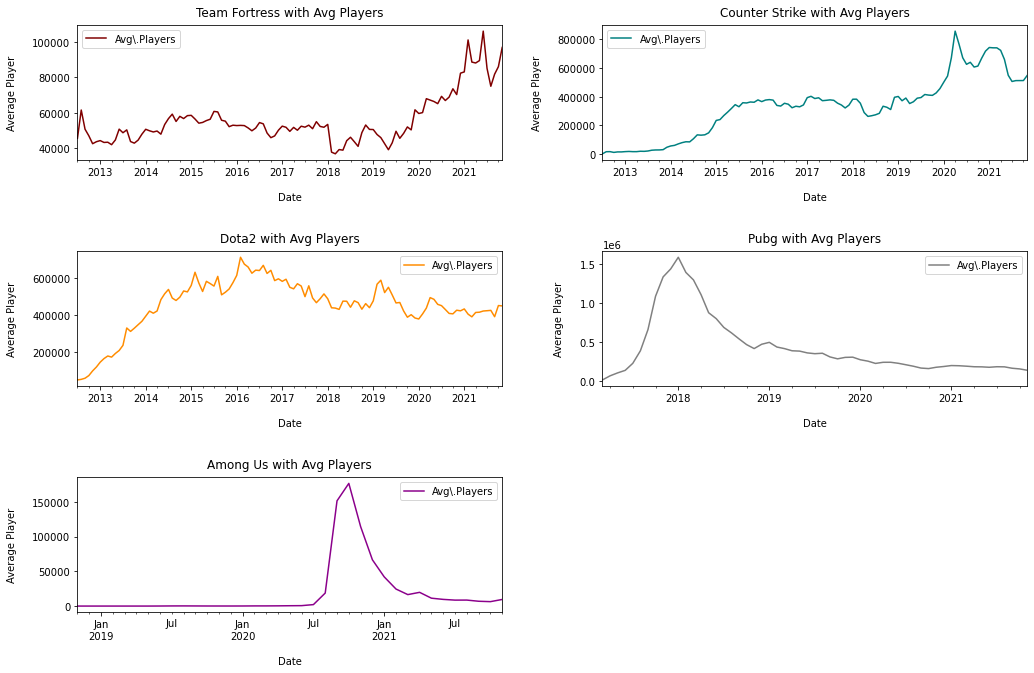

In [79]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax[2][1].set_visible(False)

df_team_cp['Month'] = pd.to_datetime(df_team_cp['Month']).dt.floor('d')
df_team_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[0,0], color='maroon')
ax[0,0].set_xlabel("Date", labelpad=15)
ax[0,0].set_ylabel("Average Player", labelpad=15)
ax[0,0].set_title("Team Fortress with Avg Players", y=1.02, fontsize=12);



df_counter_cp['Month'] = pd.to_datetime(df_counter_cp['Month']).dt.floor('d')
df_counter_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[0,1], color='teal')
ax[0,1].set_xlabel("Date", labelpad=15)
ax[0,1].set_ylabel("Average Player", labelpad=15)
ax[0,1].set_title("Counter Strike with Avg Players", y=1.02, fontsize=12);



df_dota2_cp['Month'] = pd.to_datetime(df_dota2_cp['Month']).dt.floor('d')
df_dota2_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[1,0], color='darkorange')
ax[1,0].set_xlabel("Date", labelpad=15)
ax[1,0].set_ylabel("Average Player", labelpad=15)
ax[1,0].set_title("Dota2 with Avg Players", y=1.02, fontsize=12);



df_pubg_cp['Month'] = pd.to_datetime(df_pubg_cp['Month']).dt.floor('d')
df_pubg_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[1,1], color='grey')
ax[1,1].set_xlabel("Date", labelpad=15)
ax[1,1].set_ylabel("Average Player", labelpad=15)
ax[1,1].set_title("Pubg with Avg Players", y=1.02, fontsize=12);


df_amongus_cp['Month'] = pd.to_datetime(df_amongus_cp['Month']).dt.floor('d')
df_amongus_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax= ax[2,0], color='darkmagenta')
ax[2,0].set_xlabel("Date", labelpad=15)
ax[2,0].set_ylabel("Average Player", labelpad=15)
ax[2,0].set_title("Among Us with Avg Players", y=1.02, fontsize=12);

fig.tight_layout(pad=3.0)

plt.show()



Here we see that “among us” was released in 2019. In order to make a clearer comparison, we have initiated the all line graphics from 2019 and we got the other line charts.

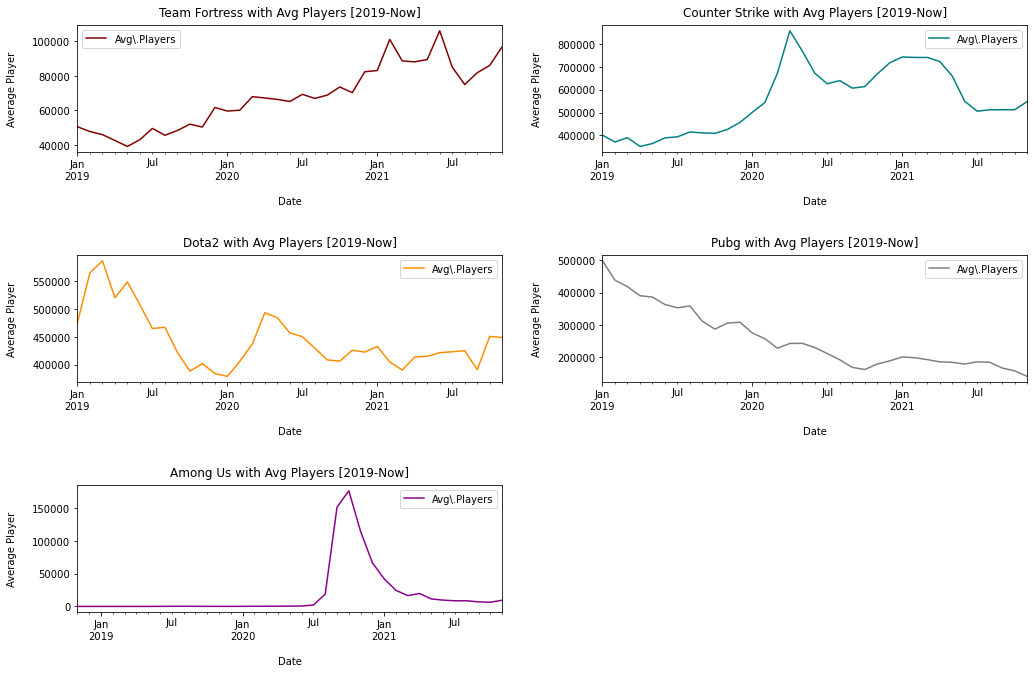

In [80]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax[2][1].set_visible(False)
df_team_ = df_team_cp[(df_team_cp['Month'] >='2019-01-01')]
df_team_.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[0,0], color='maroon')
ax[0,0].set_xlabel("Date", labelpad=15)
ax[0,0].set_ylabel("Average Player", labelpad=15)
ax[0,0].set_title("Team Fortress with Avg Players [2019-Now]", y=1.02, fontsize=12);


df_counter_= df_counter_cp[(df_counter_cp['Month'] >='2019-01-01')]
df_counter_.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[0,1], color='teal')
ax[0,1].set_xlabel("Date", labelpad=15)
ax[0,1].set_ylabel("Average Player", labelpad=15)
ax[0,1].set_title("Counter Strike with Avg Players [2019-Now]", y=1.02, fontsize=12);


df_dota2_= df_dota2_cp[(df_dota2_cp['Month'] >='2019-01-01')]
df_dota2_.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[1,0], color='darkorange')
ax[1,0].set_xlabel("Date", labelpad=15)
ax[1,0].set_ylabel("Average Player", labelpad=15)
ax[1,0].set_title("Dota2 with Avg Players [2019-Now]", y=1.02, fontsize=12);


df_pubg_= df_pubg_cp[(df_pubg_cp['Month'] >='2019-01-01')]
df_pubg_.plot(x ='Month', y='Avg\.Players', kind = 'line', ax = ax[1,1], color='grey')
ax[1,1].set_xlabel("Date", labelpad=15)
ax[1,1].set_ylabel("Average Player", labelpad=15)
ax[1,1].set_title("Pubg with Avg Players [2019-Now]", y=1.02, fontsize=12);

df_amongus_cp['Month'] = pd.to_datetime(df_amongus_cp['Month']).dt.floor('d')
df_amongus_cp.plot(x ='Month', y='Avg\.Players', kind = 'line', ax= ax[2,0], color='darkmagenta')
ax[2,0].set_xlabel("Date", labelpad=15)
ax[2,0].set_ylabel("Average Player", labelpad=15)
ax[2,0].set_title("Among Us with Avg Players [2019-Now]", y=1.02, fontsize=12);

fig.tight_layout(pad=3.0)

plt.show()




In [81]:
df_cvd = pd.read_csv('WHO-COVID-19-global-data.csv')
df_cvd_cp = df_cvd.copy()
df_cvd_cp.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [82]:
df_cvd_cp.index = pd.to_datetime(df_cvd_cp['Date_reported'],format= '%Y-%m-%d')
df_cvd_cp_sumOf2020 = df_cvd_cp.groupby(by=[df_cvd_cp.index.year,df_cvd_cp.index.month]).sum()[['New_cases']]
df_cvd_cp_sumOf2020

New_cases
Date_reported Date_reported           
2020          1                   9853
              2                  75455
              3                 750019
              4                2316871
              5                2887304
              6                4268588
              7                7025749
              8                8294421
              9                8702191
              10              12400807
              11              17082391
              12              19034848
2021          1               19753314
              2               11025821
              3               14367449
              4               21967561
              5               20195194
              6               11430414
              7               15797818
              8               19762844
              9               16055848
              10              13157592
              11              15283253
              12              14791014

From the graph, we see that the cases have been increasing linearly throughout 2020.

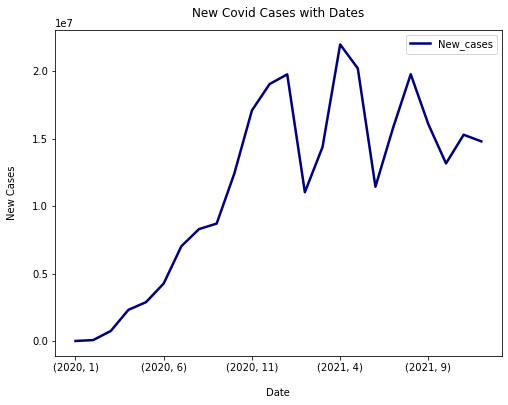

In [83]:
df_cvd_cp_sumOf2020.plot.line(figsize=(8, 6),linewidth=2.5, color='navy')
plt.xlabel("Date", labelpad=15)
plt.ylabel("New Cases", labelpad=15)
plt.title("New Covid Cases with Dates", y=1.02, fontsize=12);
plt.show()

In [84]:
df_tw = pd.read_csv('Twitch_game_data.csv',encoding='cp1252')
df_tw.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


İlgili twitch datasetinden Among Us verilerini çektim. Buradan görüldüğü üzere Twitch üzerinden izlenme saatlerine bakarsak 2020 yılının son 4 ayında, 2021 yılının ise başlarında en yüksek değerlerine ulaşmıştır.
Rank sütunundan da anlaşıldığı üzere 2020'nin 9, 10 ve 11. aylarında oyun izlenme sırası olarak 2,3,4. sıralardadır.

In [85]:
df_tw_cp = df_tw.copy()
df_tw_cp['Day'] = '01';
df_tw_cp['Date'] = pd.to_datetime(df_tw_cp[["Year", "Month", "Day"]])
df_tw_cp = df_tw_cp.drop(labels=['Day', 'Month','Year'], axis=1)
df_tw_cp[df_tw_cp['Game'] == 'Among Us'].style.background_gradient(cmap="Blues")


,Rank,Game,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
10848,49,Among Us,4156774,40450 hours,85125,221,8466,5594,54,102.760000,2020-07-01 00:00:00
11010,11,Among Us,30537792,371215 hours,266564,3044,73330,41100,499,82.260000,2020-08-01 00:00:00
11201,2,Among Us,147132248,2507735 hours,745468,12317,410661,204634,3487,58.670000,2020-09-01 00:00:00
11402,3,Among Us,109716919,2160986 hours,753943,9142,386445,147667,2908,50.770000,2020-10-01 00:00:00
11603,4,Among Us,76950746,1328891 hours,776257,5274,250289,107024,1848,57.910000,2020-11-01 00:00:00
11810,11,Among Us,50435363,898171 hours,493501,3332,178817,67880,1208,56.150000,2020-12-01 00:00:00
12014,15,Among Us,31244138,661043 hours,269117,2436,139022,42051,889,47.260000,2021-01-01 00:00:00
12220,21,Among Us,19534202,385226 hours,324430,1883,83756,29112,574,50.710000,2021-02-01 00:00:00
12420,21,Among Us,17254354,304483 hours,697975,3026,70224,23222,409,56.670000,2021-03-01 00:00:00
12619,20,Among Us,19448312,348499 hours,374767,4332,87073,27049,484,55.810000,2021-04-01 00:00:00


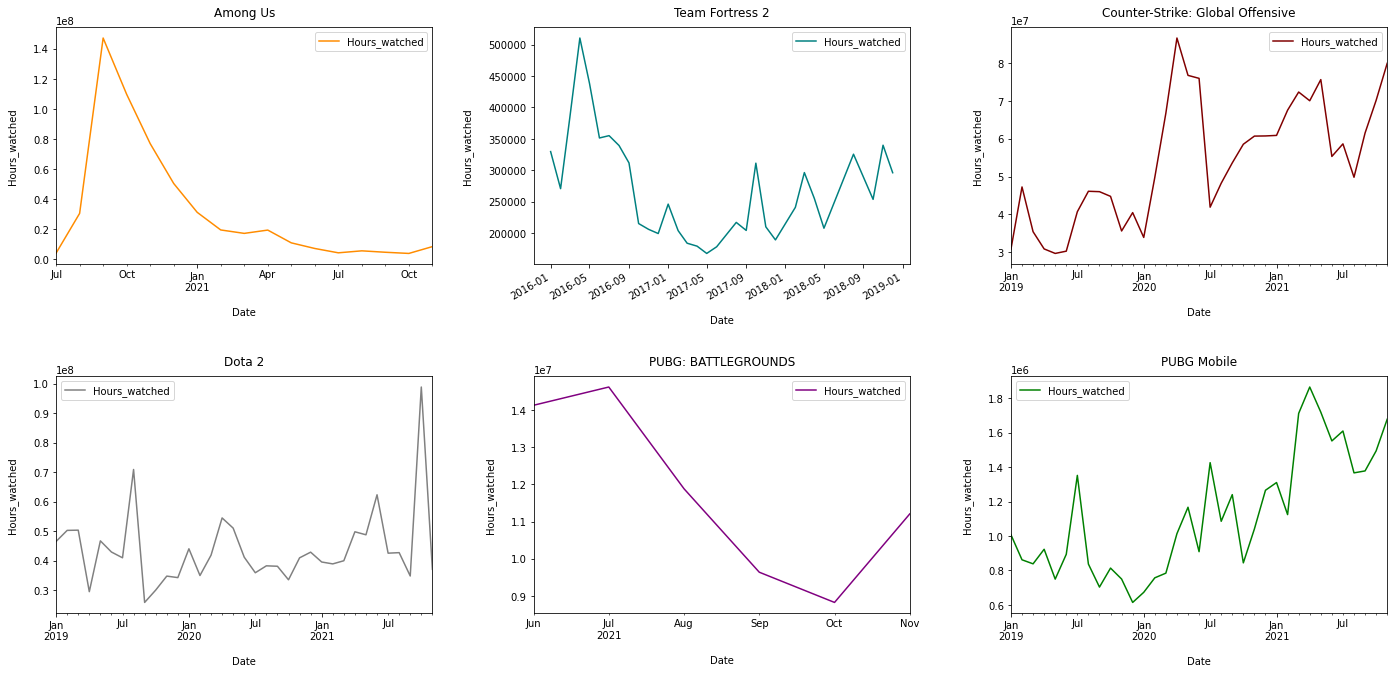

In [86]:
colors =['purple','green','orange','pink','red','blue','darkorange','teal','maroon','grey']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))


df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'Among Us')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='darkorange', ax= ax[0,0])
ax[0,0].set_xlabel("Date", labelpad=15)
ax[0,0].set_ylabel("Hours_watched", labelpad=15)
ax[0,0].set_title("Among Us", y=1.02, fontsize=12);

df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'Team Fortress 2')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='teal', ax= ax[0,1])
ax[0,1].set_xlabel("Date", labelpad=15)
ax[0,1].set_ylabel("Hours_watched", labelpad=15)
ax[0,1].set_title("Team Fortress 2", y=1.02, fontsize=12);

df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'Counter-Strike: Global Offensive') & (df_tw_cp['Date'] >= '2019-01-01')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='maroon', ax= ax[0,2])
ax[0,2].set_xlabel("Date", labelpad=15)
ax[0,2].set_ylabel("Hours_watched", labelpad=15)
ax[0,2].set_title("Counter-Strike: Global Offensive", y=1.02, fontsize=12);

df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'Dota 2') & (df_tw_cp['Date'] >= '2019-01-01')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='grey', ax= ax[1,0])
ax[1,0].set_xlabel("Date", labelpad=15)
ax[1,0].set_ylabel("Hours_watched", labelpad=15)
ax[1,0].set_title("Dota 2", y=1.02, fontsize=12);

df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'PUBG: BATTLEGROUNDS') & (df_tw_cp['Date'] >= '2019-01-01')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='purple', ax= ax[1,1])
ax[1,1].set_xlabel("Date", labelpad=15)
ax[1,1].set_ylabel("Hours_watched", labelpad=15)
ax[1,1].set_title("PUBG: BATTLEGROUNDS", y=1.02, fontsize=12);

df_tw_cp_ = df_tw_cp[(df_tw_cp['Game'] == 'PUBG Mobile') & (df_tw_cp['Date'] >= '2019-01-01')]
df_tw_cp_.plot(x ='Date', y='Hours_watched', kind = 'line',color='green', ax= ax[1,2])
ax[1,2].set_xlabel("Date", labelpad=15)
ax[1,2].set_ylabel("Hours_watched", labelpad=15)
ax[1,2].set_title("PUBG Mobile", y=1.02, fontsize=12);

fig.tight_layout(pad=3.0)


plt.show()


In [87]:
df_tw_global = pd.read_csv('Twitch_global_data.csv',encoding='cp1252')
df_tw_global_cp = df_tw_global.copy()
df_tw_global_cp['Day'] = '01';
df_tw_global_cp['Date'] = pd.to_datetime(df_tw_global_cp[["year", "Month", "Day"]])
df_tw_global_cp.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,Day,Date
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149",01,2016-01-01
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134",01,2016-02-01
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234",01,2016-03-01
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282",01,2016-04-01
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424",01,2016-05-01


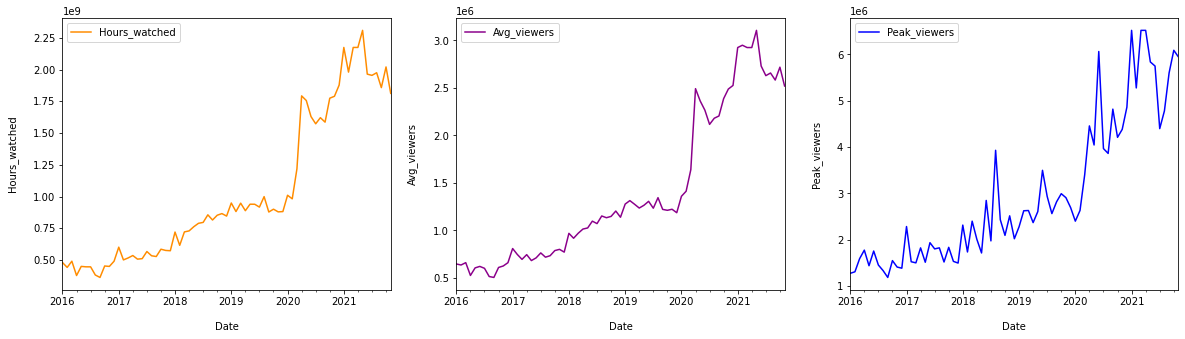

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

df_tw_global_cp.plot(x ='Date', y='Hours_watched', kind = 'line',color='darkorange', ax= ax[0])
ax[0].set_xlabel("Date", labelpad=15)
ax[0].set_ylabel("Hours_watched", labelpad=15)

df_tw_global_cp.plot(x ='Date', y='Avg_viewers', kind = 'line',color='darkmagenta', ax= ax[1])
ax[1].set_xlabel("Date", labelpad=15)
ax[1].set_ylabel("Avg_viewers", labelpad=15)

df_tw_global_cp.plot(x ='Date', y='Peak_viewers', kind = 'line',color='blue', ax= ax[2])
ax[2].set_xlabel("Date", labelpad=15)
ax[2].set_ylabel("Peak_viewers", labelpad=15)
plt.show()


In [89]:
#just a quick control that if we reach the dataset
user1.head()

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF


In [90]:
user1.shape

(100, 13)

in the process of combining 5 players with 100 game data, we add a column with the player number to the dataset in order not to confuse which game performance belongs to which player. Then we drop the columns that we will not use/useless in the dataset. which are 'Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'.

In [91]:
player1 = np.full(100,"1")
s1 = pd.Series(player1, name="Player")
user1 = pd.concat([user1, s1], axis=1)
user1=user1.drop(columns=['Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'])
#replacing names to 0-1

user1['Task Completed'].replace('-',inplace =True, value=0)
user1["Team"].replace(["Crewmate", "Imposter"], [0, 1], inplace=True)
user1["Outcome"].replace(["Loss", "Win"], [0, 1], inplace=True)
user1.head()

,Team,Outcome,Task Completed,Game Length,Rank Change,Player
0,0,1,3,07m 04s,++,1
1,0,0,7,16m 21s,--,1
2,0,1,3,11m 33s,++,1
3,1,1,0,08m 05s,+++,1
4,0,0,4,05m 10s,---,1


In [92]:
player2 = np.full(100,"2")
s2 = pd.Series(player2, name="Player")
user2 = pd.concat([user2, s2], axis=1)
user2=user2.drop(columns=['Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'])
#replacing names to 0-1
user2['Task Completed'].replace('-',inplace =True, value=0)
user2["Team"].replace(["Crewmate", "Imposter"], [0, 1], inplace=True)
user2["Outcome"].replace(["Loss", "Win"], [0, 1], inplace=True)
user2.head()

,Team,Outcome,Task Completed,Game Length,Rank Change,Player
0,0,1,4,07m 29s,++,2
1,0,0,8,08m 24s,--,2
2,1,0,0,14m 26s,--,2
3,0,1,5,09m 25s,++,2
4,0,1,9,15m 41s,++,2


In [93]:
player3 = np.full(100,"3")
s3 = pd.Series(player3, name="Player")
user3 = pd.concat([user3, s3], axis=1)
user3=user3.drop(columns=['Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'])
#replacing names to 0-1
user3['Task Completed'].replace('-',inplace =True, value=0)
user3["Team"].replace(["Crewmate", "Imposter"], [0, 1], inplace=True)
user3["Outcome"].replace(["Loss", "Win"], [0, 1], inplace=True)
user3.head()

,Team,Outcome,Task Completed,Game Length,Rank Change,Player
0,0,1,3,05m 10s,++,3
1,0,1,2,08m 11s,++,3
2,0,0,7,11m 04s,--,3
3,1,0,0,05m 36s,-,3
4,0,0,7,13m 46s,--,3


In [94]:
player4 = np.full(100,"4")
s4 = pd.Series(player4, name="Player")
user4 = pd.concat([user4, s4], axis=1)
user4=user4.drop(columns=['Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'])
#replacing names to 0-1
user4['Task Completed'].replace('-',inplace =True, value=0)
user4["Team"].replace(["Crewmate", "Imposter"], [0, 1], inplace=True)
user4["Outcome"].replace(["Loss", "Win"], [0, 1], inplace=True)
user4.head()

,Team,Outcome,Task Completed,Game Length,Rank Change,Player
0,1,1,0,09m 23s,+++,4
1,0,1,8,17m 53s,++,4
2,1,0,0,14m 25s,--,4
3,0,0,8,10m 49s,--,4
4,0,1,7,14m 33s,++,4


In [95]:
player5 = np.full(100,"5")
s5 = pd.Series(player5, name="Player")
user5 = pd.concat([user5, s5], axis=1)
user5=user5.drop(columns=['Murdered','Game Completed Date','Sabotages Fixed','Region/Game Code','Time to complete all tasks','Ejected','All Tasks Completed','Imposter Kills'])
#replacing names to 0-1
user5['Task Completed'].replace('-',inplace =True, value=0)
user5["Team"].replace(["Crewmate", "Imposter"], [0, 1], inplace=True)
user5["Outcome"].replace(["Loss", "Win"], [0, 1], inplace=True)
user5.head()

,Team,Outcome,Task Completed,Game Length,Rank Change,Player
0,0,1,6,12m 12s,++,5
1,0,0,1,05m 11s,---,5
2,1,0,0,14m 13s,-,5
3,0,1,1,05m 18s,++,5
4,0,1,2,15m 08s,++,5


We replace the + ++ +++ - -- --- expressions in the "rank change" column in the dataset with the numbers 1 2 3 -1 -2 -3 respectively to make them more meaningful and usable. This will help us understand Change in rank after the win/loss of the game.

In [96]:
frames = [user1, user2, user3, user4, user5]
df_player = pd.concat(frames,ignore_index=True)
def extract_seconds(s):
        m = int(s[:2])
        s = int(s[4:6])
        return 60*m+s
df_player["Game Length"] = df_player["Game Length"].apply(extract_seconds)
df_player["Rank Change"].replace(["+", "++", "+++", "-", "--", "---", np.NaN], [1, 2, 3, -1, -2, -3, 0], inplace=True)
df_player.info

<bound method DataFrame.info of      Team  Outcome Task Completed  Game Length  Rank Change Player
0       0        1              3          424            2      1
1       0        0              7          981           -2      1
2       0        1              3          693            2      1
3       1        1              0          485            3      1
4       0        0              4          310           -3      1
..    ...      ...            ...          ...          ...    ...
495     0        1              7          905            2      5
496     0        0              7          667           -2      5
497     1        0              0          706           -1      5
498     0        1              2          182            0      5
499     0        1              4          924            2      5

[500 rows x 6 columns]>

With the plot pie graph here, we see the win/lose percentages for a total of 500 game performances.

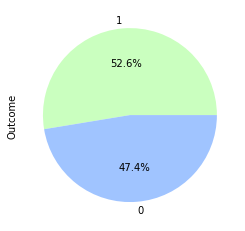

In [97]:
mycolors = ["#caffbf", "#a0c4ff"]
df_player.Outcome.value_counts().plot(kind = 'pie', autopct='%1.1f%%',colors=mycolors)
plt.show()

here we analyze the time spent on an average game for each player and for all players. This shows that players spend about 10 minutes for a one-set game. From here, we can see that the average playing time of 10 minutes pushes the player to start a new set quickly.

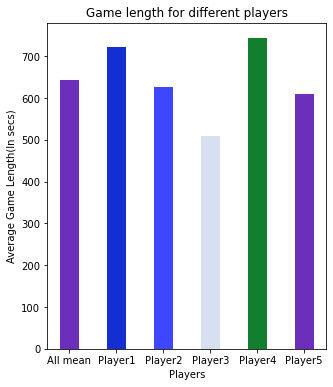

In [98]:
custom_colors = ["#6b2fbb","#132ed1","#3f47fe","#d6e0f0","#117f2d","#50ef39","#38fedc","#71491e","#c51111","#ed54ba","#ef7d0d","#f5f557"]
import matplotlib.pyplot as plt  
data= {'All mean':df_player['Game Length'].mean(), 'Player1':df_player['Game Length'].loc[df_player['Player']=='1'].mean()
, 'Player2':df_player['Game Length'].loc[df_player['Player']=='2'].mean(),'Player3':df_player['Game Length'].loc[df_player['Player']=='3'].mean()
       ,'Player4':df_player['Game Length'].loc[df_player['Player']=='4'].mean(),'Player5':df_player['Game Length'].loc[df_player['Player']=='5'].mean()}

players = list(data.keys()) 
meanTime = list(data.values()) 
   
fig = plt.figure(figsize = (5, 6)) 
  
# creating the bar plot 
plt.bar(players, meanTime, color = [custom_colors[0],custom_colors[1],custom_colors[2],custom_colors[3],custom_colors[4]],  
        width = 0.4) 
  
plt.xlabel("Players") 
plt.ylabel("Average Game Length(In secs)") 
plt.title("Game length for different players") 
plt.show() 

we splitting dataset into train and test sets using sklearn. In order to calculate the classification results according to the game's win or lose situations, we remove the outcome property from one group and assign it to the other group. And we split our dataset into 25% test and 75% train set

In [99]:
x = df_player.drop(['Outcome'], axis=1)
y =df_player['Outcome']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 25, test_size = 0.25)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375,)
(125,)


In [101]:
clf_gini = tree.DecisionTreeClassifier(criterion='gini')
clf_gini.fit(x_train, y_train)
y_pred_gini= clf_gini.predict(x_test)

In [102]:
#accuracy score for gini train set
y_pred_train_gini = clf_gini.predict(x_train)
print('{0:0.3f}'.format(accuracy_score(y_train, y_pred_train_gini)))

1.000


In [103]:
#accuracy score for gini test set
print('{0:0.3f}'.format(accuracy_score(y_test, y_pred_gini)))

0.904


In [104]:
#tree.plot_tree(clf_gini.fit(x_train,y_train))

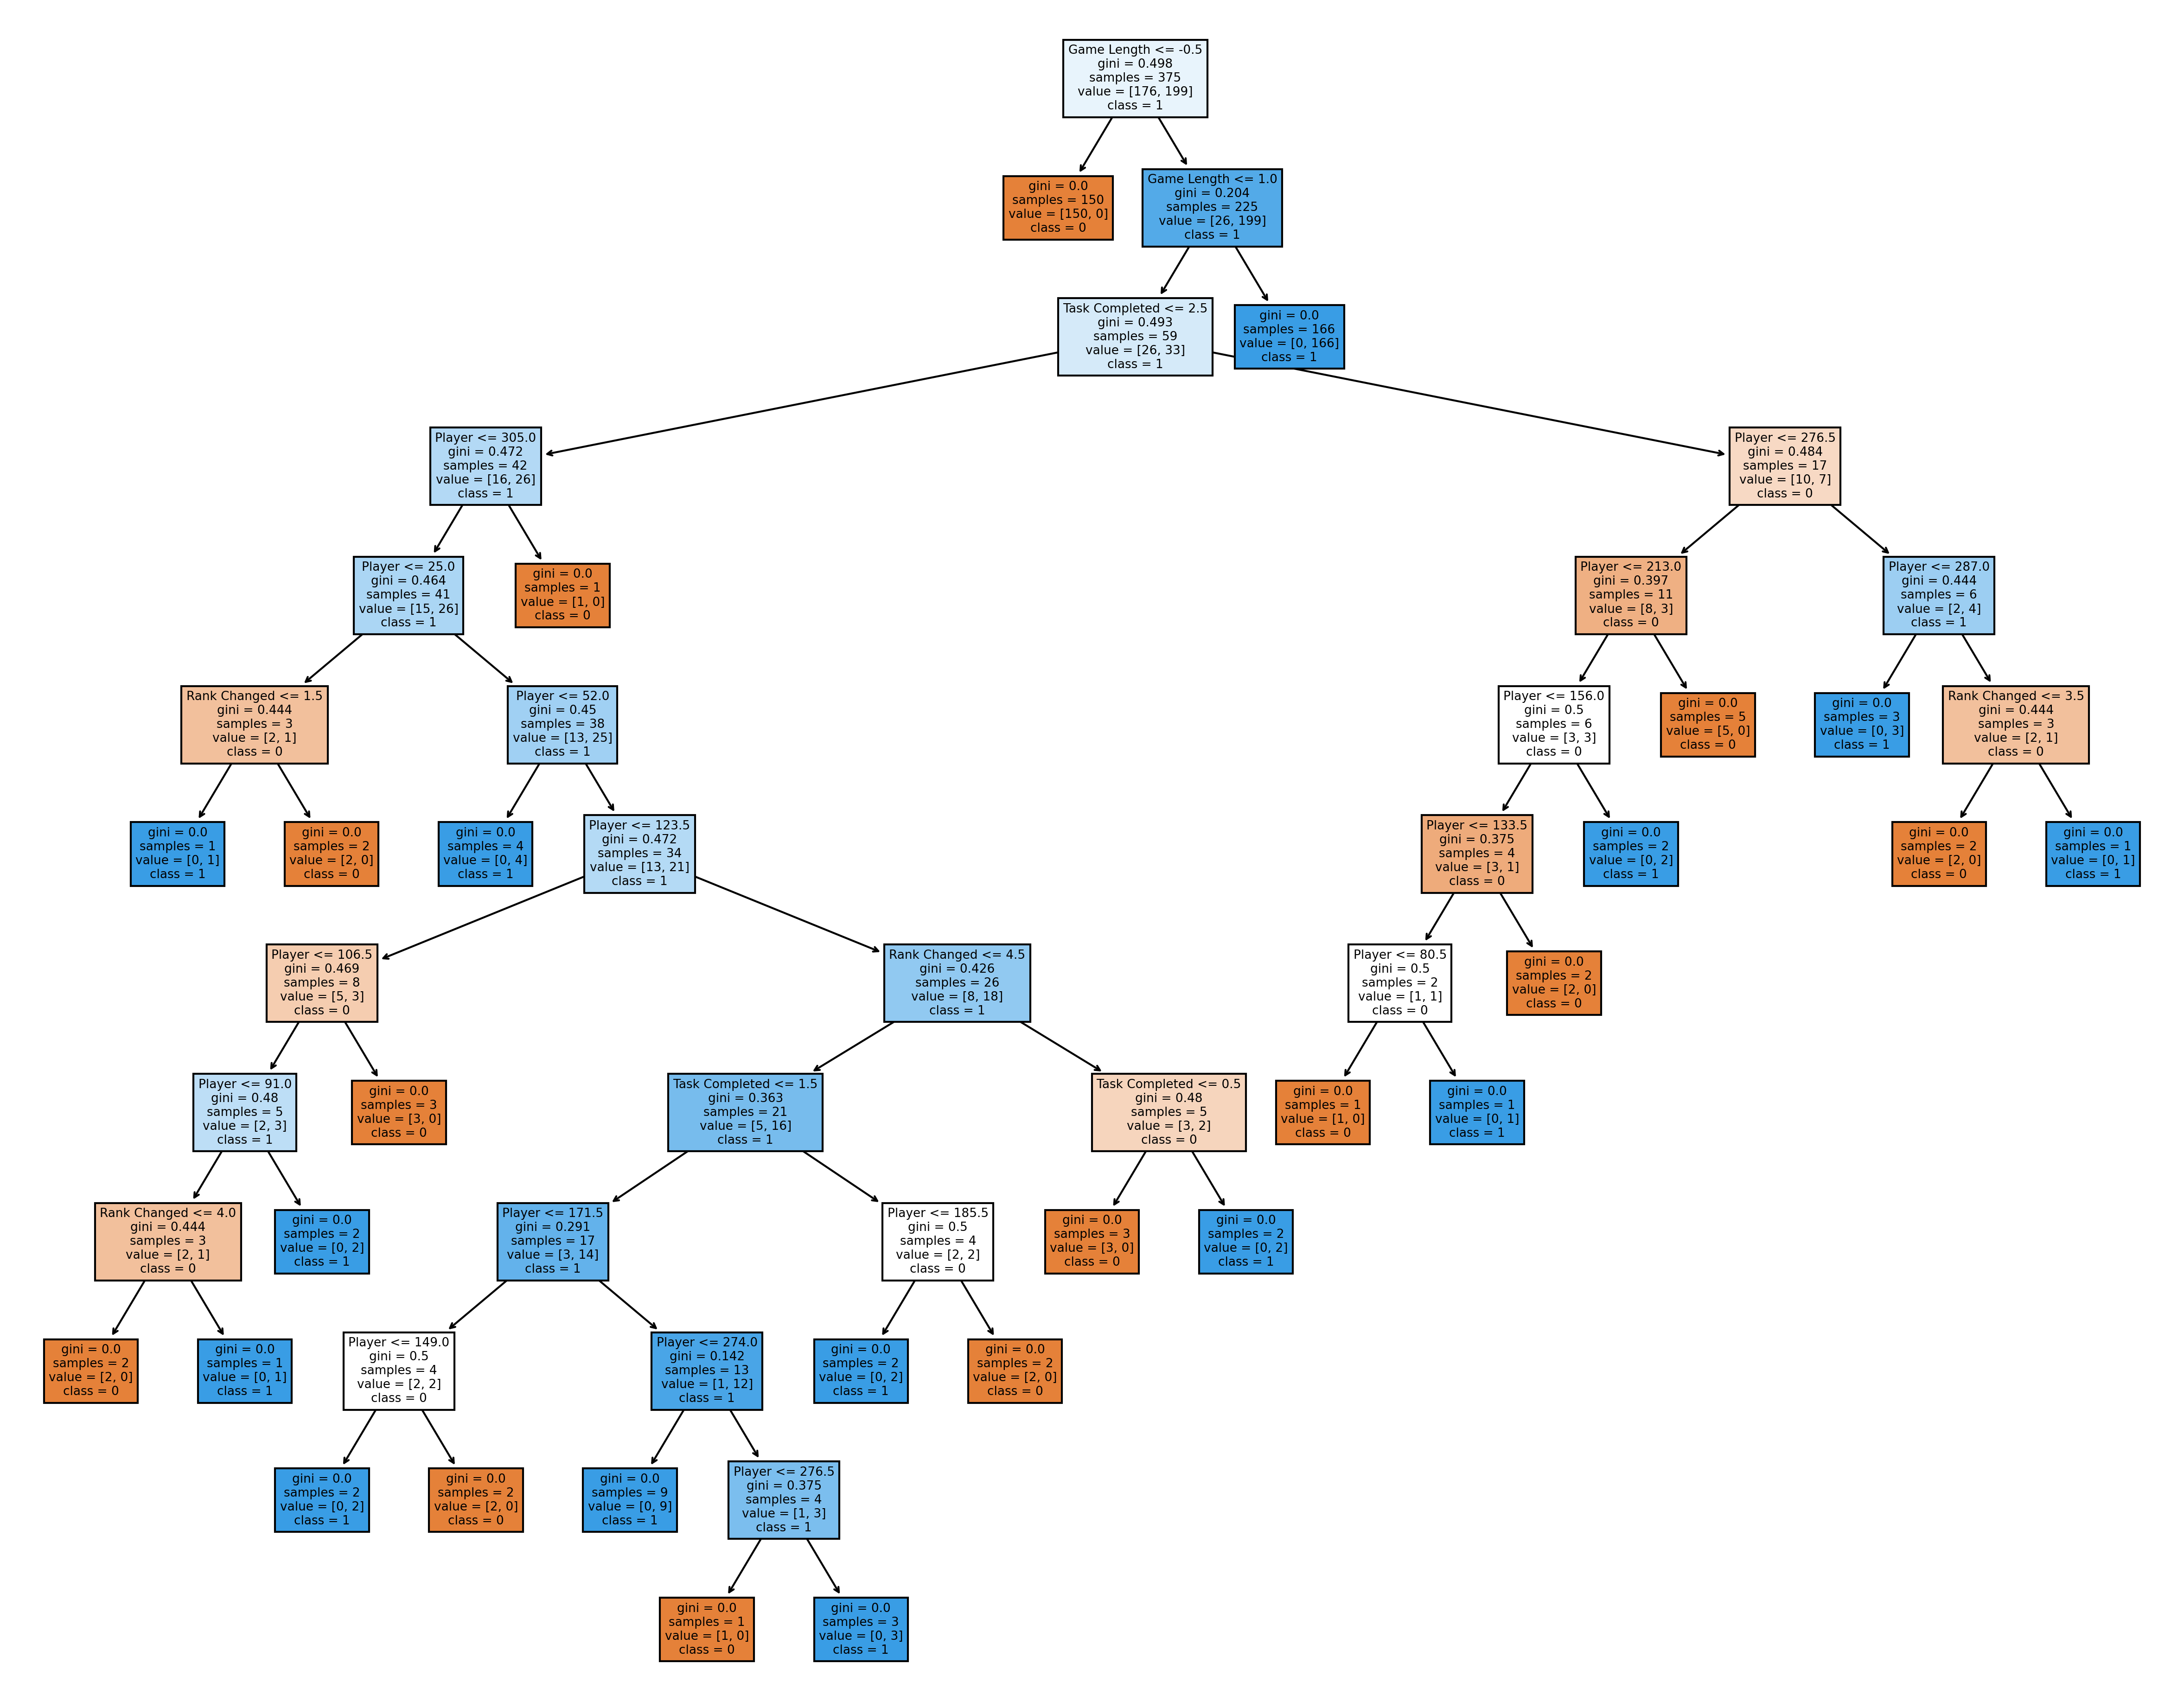

In [105]:
fn=['Team','Task Completed','Player','Game Length','Rank Changed']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,16), dpi=300)
tree.plot_tree(clf_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('gini.png')

tree.export_graphviz(clf_gini,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

We used the confusion matrix to visualize the result of the decision tree classification. As a result, we saw that the tree correctly predicted (57+55)=112 out of 125 game data as a result of using the test set according to the game data we determined.

#from_estimator needs scikit-learn==1.0.0 and upper versions

Confusion matrix
[[57  4]
 [ 8 56]]


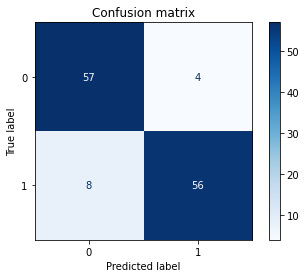

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        61
           1       0.93      0.88      0.90        64

    accuracy                           0.90       125
   macro avg       0.91      0.90      0.90       125
weighted avg       0.91      0.90      0.90       125



In [106]:
titles_options = [
    ("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf_gini,
        x_test,
        y_test,
        display_labels=cn,
        cmap=plt.cm.Blues,

    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

print(classification_report(y_test, y_pred_gini,target_names=['0','1']))